## Business Problem Overview
Customer Retention has become more important than customer aquisition for telecom companies as it is 5-10 times more expensive to aquire a new customer. To reduce the customer churn, the companies need to ***predict which customers are at high risk of churn.***

***Provided with:*** Customer level data of telecom company for June, July, August and September month<br>
***Required to:***<br>
- Identify the top indicators of customer churn
- Build a prediction model to identify the customers who are about to churn

The dataset is based on the Indian and South East Asian market. Evaluation of the dataset will be done based on Usage-Based Churn. Target customers will be High value customers.

## Steps / Flow Description for the case study
1. Import the required packages and libraries for analysis and predictions
2. Import the data set into dataframe for analysis
3. Understand the metadata of dataframe
4. Filtering data for high value customers only
    - Missing Value Analysis for the columns which will help in indentification
    - Deriving new features based on the identified columns
    - Applying the filter of 70th percentile on data frame
5. Data cleaning on filtered dataset
    - Missing value handling

### 1. Import the required packages and libraries for analysis and predictions

In [355]:
# Importing required packages and libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np, pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

warnings.filterwarnings('ignore')

In [356]:
pd.set_option('display.max_rows', 250)
pd.set_option('display.max_columns', 250)

### 2. Import the data set into dataframe for analysis

In [357]:
# Importing the dataset into dataframe for analysis and predictions
churn = pd.read_csv('telecom_churn_data.csv')
churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.38,214.82,213.80,21.10,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,0.00,0.00,0.00,0.00,nan,nan,0.16,nan,nan,nan,4.13,nan,nan,nan,1.15,nan,nan,nan,5.44,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,0.00,0.00,5.44,0.00,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,na

### 3. Understand the metadata of dataframe

In [358]:
# Shape of dataframe
churn.shape

(99999, 226)

In [359]:
# Metadata information
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [360]:
# Column list of dataframe
print(churn.columns)

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)


***There are four types of columns:***
1. Columns for June month (Good Phase)
2. Columns for July month (Good Phase)
3. Columns for August month ('Action Phase')
4. Columns for September month ('Churn Phase')
5. Common columns (Information applicable to all above columns)

- Columns for June and July will be used to identify the high valued customers.
- Columns for September month will used to identify the churn and non-churn members.
- Columns for August month will be used for analysis on idenfication of factors for churn members

In [361]:
# Object features
obj_features = churn.select_dtypes('object')
obj_features.head()

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9
0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/21/2014,7/16/2014,8/8/2014,9/28/2014,6/21/2014,7/16/2014,8/8/2014,NaN
1,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/29/2014,7/31/2014,8/28/2014,9/30/2014,NaN,7/25/2014,8/10/2014,NaN
2,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/17/2014,7/24/2014,8/14/2014,9/29/2014,NaN,NaN,NaN,9/17/2014
3,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/28/2014,7/31/2014,8/31/2014,9/30/2014,NaN,NaN,NaN,NaN
4,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/26/2014,7/28/2014,8/9/2014,9/28/2014,6/4/2014,NaN,NaN,NaN


In [362]:
# last_date_of_month columns for June, July, August and September have a constant value and will not help in analysis.
churn = churn.drop(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9'], axis = 1)
obj_features = churn.select_dtypes('object')
obj_features.head()

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9
0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,6/21/2014,7/16/2014,8/8/2014,NaN
1,6/29/2014,7/31/2014,8/28/2014,9/30/2014,NaN,7/25/2014,8/10/2014,NaN
2,6/17/2014,7/24/2014,8/14/2014,9/29/2014,NaN,NaN,NaN,9/17/2014
3,6/28/2014,7/31/2014,8/31/2014,9/30/2014,NaN,NaN,NaN,NaN
4,6/26/2014,7/28/2014,8/9/2014,9/28/2014,6/4/2014,NaN,NaN,NaN


In [363]:
# int64 features
int_features = churn.select_dtypes('int64')
int_features.head()

,mobile_number,circle_id,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon
0,7000842753,109,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968
1,7001865778,109,4,9,11,5,74,384,283,121,44,154,65,50,44,23,30,0,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1006
2,7001625959,109,5,4,2,7,168,315,116,358,86,200,86,100,0,200,86,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1103
3,7001204172,109,10,11,18,14,230,310,601,410,60,50,50,50,30,50,50,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2491
4,7000142493,109,5,6,3,4,196,350,287,200,56,110,110,50,50,110,110,50,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1526


In [364]:
# float64 features
float_features = churn.select_dtypes('float64')
float_features.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,0.00,0.00,0.00,197.38,214.82,213.80,21.10,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,0.00,0.00,0.00,0.00,nan,nan,0.16,nan,nan,nan,4.13,nan,nan,nan,1.15,nan,nan,nan,5.44,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,0.00,0.00,5.44,0.00,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,1.00,1.00,1.00,nan,252.00,252.00,252.00,nan,0.00,0.00,0.00,nan,1.00,1.00,1.00,nan,252.00,252.00,252.00,nan,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,212.17,212.17,212.17,nan,212.17,212.17,212.17,nan,0.00,0.00,0.00,nan,1.00,1.00,1.00,nan,30.40,0.00,101.20,3.58
1,0.00,0.00,0.00,34.05,355.07,268.32,86.28,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.00,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.23,4.58,0.13,0.00,0.00,0.00,0.00,0.00,4.68,23.43,12.76,0.00,0.00,0.00,0.00,0.00,40.31,178.53,312.44,72.11,1.61,29.91,29.23,116.09,17.48,65.38,375.58,56.93,0.00,8.93,3.61,0.00,19.09,104.23,408.43,173.03,0.00,0.00,2.35,0.00,5.90

In [365]:
# June Month Columns
june_columns = [i for i in churn.columns if '_6' in i]
print(june_columns)
print(len(june_columns))

['arpu_6', 'onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6', 'roam_og_mou_6', 'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6', 'std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_t2c_mou_6', 'std_og_mou_6', 'isd_og_mou_6', 'spl_og_mou_6', 'og_others_6', 'total_og_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'loc_ic_mou_6', 'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_t2o_mou_6', 'std_ic_mou_6', 'total_ic_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6', 'ic_others_6', 'total_rech_num_6', 'total_rech_amt_6', 'max_rech_amt_6', 'date_of_last_rech_6', 'last_day_rch_amt_6', 'date_of_last_rech_data_6', 'total_rech_data_6', 'max_rech_data_6', 'count_rech_2g_6', 'count_rech_3g_6', 'av_rech_amt_data_6', 'vol_2g_mb_6', 'vol_3g_mb_6', 'arpu_3g_6', 'arpu_2g_6', 'night_pck_user_6', 'monthly_2g_6', 'sachet_2g_6', 'monthly_3g_6', 'sachet_3g_6', 'fb_user_6']
53


In [366]:
# July Month Columns
july_columns = [i for i in churn.columns if '_7' in i]
print(july_columns)
print(len(july_columns))

['arpu_7', 'onnet_mou_7', 'offnet_mou_7', 'roam_ic_mou_7', 'roam_og_mou_7', 'loc_og_t2t_mou_7', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7', 'loc_og_mou_7', 'std_og_t2t_mou_7', 'std_og_t2m_mou_7', 'std_og_t2f_mou_7', 'std_og_t2c_mou_7', 'std_og_mou_7', 'isd_og_mou_7', 'spl_og_mou_7', 'og_others_7', 'total_og_mou_7', 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_7', 'loc_ic_mou_7', 'std_ic_t2t_mou_7', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_7', 'std_ic_t2o_mou_7', 'std_ic_mou_7', 'total_ic_mou_7', 'spl_ic_mou_7', 'isd_ic_mou_7', 'ic_others_7', 'total_rech_num_7', 'total_rech_amt_7', 'max_rech_amt_7', 'date_of_last_rech_7', 'last_day_rch_amt_7', 'date_of_last_rech_data_7', 'total_rech_data_7', 'max_rech_data_7', 'count_rech_2g_7', 'count_rech_3g_7', 'av_rech_amt_data_7', 'vol_2g_mb_7', 'vol_3g_mb_7', 'arpu_3g_7', 'arpu_2g_7', 'night_pck_user_7', 'monthly_2g_7', 'sachet_2g_7', 'monthly_3g_7', 'sachet_3g_7', 'fb_user_7']
53


In [367]:
# August Month Columns
aug_columns = [i for i in churn.columns if '_8' in i]
print(aug_columns)
print(len(aug_columns))

['arpu_8', 'onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8', 'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_t2c_mou_8', 'std_og_mou_8', 'isd_og_mou_8', 'spl_og_mou_8', 'og_others_8', 'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_t2o_mou_8', 'std_ic_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8', 'total_rech_num_8', 'total_rech_amt_8', 'max_rech_amt_8', 'date_of_last_rech_8', 'last_day_rch_amt_8', 'date_of_last_rech_data_8', 'total_rech_data_8', 'max_rech_data_8', 'count_rech_2g_8', 'count_rech_3g_8', 'av_rech_amt_data_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'arpu_3g_8', 'arpu_2g_8', 'night_pck_user_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8', 'fb_user_8']
53


In [368]:
# September Month Columns
sep_columns = [i for i in churn.columns if '_9' in i]
print(sep_columns)
print(len(sep_columns))

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9', 'date_of_last_rech_data_9', 'total_rech_data_9', 'max_rech_data_9', 'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9']
53


In [369]:
# Common columns
com_columns = set(churn.columns).difference(
                                                set(june_columns).union
                                                (
                                                    set(july_columns).union
                                                    (
                                                        set(aug_columns).union
                                                        (
                                                            set(sep_columns)
                                                        )
                                                    )
                                                )
                                            )
print(com_columns)
print(len(com_columns))

{'std_og_t2o_mou', 'aug_vbc_3g', 'jul_vbc_3g', 'loc_ic_t2o_mou', 'jun_vbc_3g', 'circle_id', 'aon', 'mobile_number', 'loc_og_t2o_mou', 'sep_vbc_3g'}
10


Following columns should be renamed:
1. jun_vbc_3g to vbc_3g_6
2. jul_vbc_3g to vbc_3g_7
3. aug_vbc_3g to vbc_3g_8
4. sep_vbc_3g to vbc_3g_9

In [370]:
# Renaming the columns
churn = churn.rename({'jun_vbc_3g': 'vbc_3g_6', 'jul_vbc_3g': 'vbc_3g_7', 'aug_vbc_3g': 'vbc_3g_8', 'sep_vbc_3g': 'vbc_3g_9'}, axis= 1)

print('June Columns')
print('--------------------------------------------------------------')
# June Columns
june_columns = [i for i in churn.columns if '_6' in i]
print(june_columns)
print(len(june_columns))

print('July Columns')
print('--------------------------------------------------------------')
# July Columns
july_columns = [i for i in churn.columns if '_7' in i]
print(july_columns)
print(len(july_columns))

print('August Columns')
print('--------------------------------------------------------------')
# August Columns
aug_columns = [i for i in churn.columns if '_8' in i]
print(aug_columns)
print(len(aug_columns))

print('September Columns')
print('--------------------------------------------------------------')
# September Columns
sep_columns = [i for i in churn.columns if '_9' in i]
print(sep_columns)
print(len(sep_columns))

print('Common Columns')
print('--------------------------------------------------------------')
# Common columns
com_columns = set(churn.columns).difference(
                                                set(june_columns).union
                                                (
                                                    set(july_columns).union
                                                    (
                                                        set(aug_columns).union
                                                        (
                                                            set(sep_columns)
                                                        )
                                                    )
                                                )
                                            )
com_columns = list(com_columns)
print(com_columns)
print(len(com_columns))

June Columns
--------------------------------------------------------------
['arpu_6', 'onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6', 'roam_og_mou_6', 'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6', 'std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_t2c_mou_6', 'std_og_mou_6', 'isd_og_mou_6', 'spl_og_mou_6', 'og_others_6', 'total_og_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'loc_ic_mou_6', 'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_t2o_mou_6', 'std_ic_mou_6', 'total_ic_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6', 'ic_others_6', 'total_rech_num_6', 'total_rech_amt_6', 'max_rech_amt_6', 'date_of_last_rech_6', 'last_day_rch_amt_6', 'date_of_last_rech_data_6', 'total_rech_data_6', 'max_rech_data_6', 'count_rech_2g_6', 'count_rech_3g_6', 'av_rech_amt_data_6', 'vol_2g_mb_6', 'vol_3g_mb_6', 'arpu_3g_6', 'arpu_2g_6', 'night_pck_user_6', 'monthly_2g_6', 'sachet_2g_6', 'monthly_3g_6', 

The columns are renamed are now following the standards as mentioned in data dictionary

In [371]:
churn.shape

(99999, 222)

In [372]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 222 entries, mobile_number to vbc_3g_9
dtypes: float64(179), int64(35), object(8)
memory usage: 169.4+ MB


In [373]:
amt_recharge_columns =  churn.columns[churn.columns.str.contains('rech_amt|rech_data')]
amt_recharge_columns

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'max_rech_amt_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
       'av_rech_amt_data_9'],
      dtype='object')

### 4. Filtering data for high value customers only

#### High Value Customers:
These customers will be decided based on the usage in the month of June and July i.e. the good phase.<br>
***The customers which have recharged with an amount more than or equal the 70th percentile of the average recharge amount in the first two months (the good phase).***

In [374]:
rech_columns = [i for i in churn.columns if ('rech' in i) & ('amt' in i) & (('_6' in i) | ('_7' in i))]
rech_columns

['total_rech_amt_6',
 'total_rech_amt_7',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7']

From the above list we can say that total_rech_amt and av_rech_amt_data columns can be used for filtering the high value customers

#### Missing Value Analysis for the columns which will help in indentification

In [375]:
round((churn[com_columns + rech_columns].isnull().sum()/len(churn[com_columns + rech_columns]))*100, 2)

std_og_t2o_mou                       1.02
loc_ic_t2o_mou                       1.02
circle_id                            0.00
aon                                  0.00
mobile_number                        0.00
loc_og_t2o_mou                       1.02
total_rech_amt_6                     0.00
total_rech_amt_7                     0.00
max_rech_amt_6                       0.00
max_rech_amt_7                       0.00
av_rech_amt_data_6                  74.85
av_rech_amt_data_7                  74.43
dtype: float64

In [376]:
# checking null values in all rech columns
telecom_df_null_check = 100*churn.loc[:,amt_recharge_columns].isnull().sum()/len(churn)
df = pd.DataFrame(telecom_df_null_check)
df.rename(columns={0:'Percentage of Nulls'}, inplace = True)
df

,Percentage of Nulls
total_rech_amt_6,0.00
total_rech_amt_7,0.00
total_rech_amt_8,0.00
total_rech_amt_9,0.00
max_rech_amt_6,0.00
max_rech_amt_7,0.00
max_rech_amt_8,0.00
max_rech_amt_9,0.00
date_of_last_rech_data_6,74.85
date_of_last_rech_data_7,74.43


Imputing 0.0 where null value is present for 'av_rech_amt_data' columns and 'total_rech_data' in dataframe

In [377]:
# Imputing values to the null records for av_rech_amt_data and 
churn.av_rech_amt_data_6 = churn.av_rech_amt_data_6.fillna('0.0')
churn.av_rech_amt_data_7 = churn.av_rech_amt_data_7.fillna('0.0')
churn.av_rech_amt_data_8 = churn.av_rech_amt_data_8.fillna('0.0')
churn.av_rech_amt_data_9 = churn.av_rech_amt_data_9.fillna('0.0')
churn.total_rech_data_6 = churn.total_rech_data_6.fillna('0.0')
churn.total_rech_data_7 = churn.total_rech_data_7.fillna('0.0')
churn.total_rech_data_8 = churn.total_rech_data_8.fillna('0.0')
churn.total_rech_data_9 = churn.total_rech_data_9.fillna('0.0')

In [378]:
# Missing value analysis again on dataframe
round((churn[com_columns + rech_columns].isnull().sum()/len(churn[com_columns + rech_columns]))*100, 2)

std_og_t2o_mou                       1.02
loc_ic_t2o_mou                       1.02
circle_id                            0.00
aon                                  0.00
mobile_number                        0.00
loc_og_t2o_mou                       1.02
total_rech_amt_6                     0.00
total_rech_amt_7                     0.00
max_rech_amt_6                       0.00
max_rech_amt_7                       0.00
av_rech_amt_data_6                   0.00
av_rech_amt_data_7                   0.00
dtype: float64

In [379]:
# Checking the columns loc_ic_t2o_mou, stg_og_t2o_mou and loc_og_t2o_mou
churn[['loc_ic_t2o_mou', 'std_og_t2o_mou', 'loc_og_t2o_mou']].head()

,loc_ic_t2o_mou,std_og_t2o_mou,loc_og_t2o_mou
0,0.00,0.00,0.00
1,0.00,0.00,0.00
2,0.00,0.00,0.00
3,0.00,0.00,0.00
4,0.00,0.00,0.00


In [380]:
# checking the unique values for the features
print(churn.loc_ic_t2o_mou.unique())
print(churn.std_og_t2o_mou.unique())
print(churn.loc_og_t2o_mou.unique())

[ 0. nan]
[ 0. nan]
[ 0. nan]


Either the column has null value or 0, therefore dropping the columns

In [381]:
churn = churn.drop(['loc_ic_t2o_mou', 'std_og_t2o_mou', 'loc_og_t2o_mou'], axis= 1)

In [382]:
# Computing different types of columns again
print('June Columns')
print('--------------------------------------------------------------')
# June Columns
june_columns = [i for i in churn.columns if '_6' in i]
print(june_columns)
print(len(june_columns))

print('July Columns')
print('--------------------------------------------------------------')
# July Columns
july_columns = [i for i in churn.columns if '_7' in i]
print(july_columns)
print(len(july_columns))

print('August Columns')
print('--------------------------------------------------------------')
# August Columns
aug_columns = [i for i in churn.columns if '_8' in i]
print(aug_columns)
print(len(aug_columns))

print('September Columns')
print('--------------------------------------------------------------')
# September Columns
sep_columns = [i for i in churn.columns if '_9' in i]
print(sep_columns)
print(len(sep_columns))

print('Common Columns')
print('--------------------------------------------------------------')
# Common columns
com_columns = set(churn.columns).difference(
                                                set(june_columns).union
                                                (
                                                    set(july_columns).union
                                                    (
                                                        set(aug_columns).union
                                                        (
                                                            set(sep_columns)
                                                        )
                                                    )
                                                )
                                            )
com_columns = list(com_columns)
print(com_columns)
print(len(com_columns))

June Columns
--------------------------------------------------------------
['arpu_6', 'onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6', 'roam_og_mou_6', 'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6', 'std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_t2c_mou_6', 'std_og_mou_6', 'isd_og_mou_6', 'spl_og_mou_6', 'og_others_6', 'total_og_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'loc_ic_mou_6', 'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_t2o_mou_6', 'std_ic_mou_6', 'total_ic_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6', 'ic_others_6', 'total_rech_num_6', 'total_rech_amt_6', 'max_rech_amt_6', 'date_of_last_rech_6', 'last_day_rch_amt_6', 'date_of_last_rech_data_6', 'total_rech_data_6', 'max_rech_data_6', 'count_rech_2g_6', 'count_rech_3g_6', 'av_rech_amt_data_6', 'vol_2g_mb_6', 'vol_3g_mb_6', 'arpu_3g_6', 'arpu_2g_6', 'night_pck_user_6', 'monthly_2g_6', 'sachet_2g_6', 'monthly_3g_6', 

In [383]:
# Missing value analysis again on dataframe
round((churn[com_columns + rech_columns].isnull().sum()/len(churn[com_columns + rech_columns]))*100, 2)

aon                                  0.00
mobile_number                        0.00
circle_id                            0.00
total_rech_amt_6                     0.00
total_rech_amt_7                     0.00
max_rech_amt_6                       0.00
max_rech_amt_7                       0.00
av_rech_amt_data_6                   0.00
av_rech_amt_data_7                   0.00
dtype: float64

All missing values for the high value customer columns are handled

In [384]:
# Checking the metadata for the subset
churn[com_columns + rech_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   aon                 99999 non-null  int64 
 1   mobile_number       99999 non-null  int64 
 2   circle_id           99999 non-null  int64 
 3   total_rech_amt_6    99999 non-null  int64 
 4   total_rech_amt_7    99999 non-null  int64 
 5   max_rech_amt_6      99999 non-null  int64 
 6   max_rech_amt_7      99999 non-null  int64 
 7   av_rech_amt_data_6  99999 non-null  object
 8   av_rech_amt_data_7  99999 non-null  object
dtypes: int64(7), object(2)
memory usage: 6.9+ MB


av_rech_amt_data is of object type. Checking and coverting the column into float for analysis

In [385]:
churn[['av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9']].head()

,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
0,252.00,252.00,252.00,0.0
1,0.0,154.00,50.00,0.0
2,0.0,0.0,0.0,46.00
3,0.0,0.0,0.0,0.0
4,56.00,0.0,0.0,0.0


In [386]:
# Since the columns appears to be having numbers only so cnverting the columns into float64
churn[['av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9']] = churn[['av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9']].apply(pd.to_numeric)

In [387]:
churn[com_columns + rech_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   aon                 99999 non-null  int64  
 1   mobile_number       99999 non-null  int64  
 2   circle_id           99999 non-null  int64  
 3   total_rech_amt_6    99999 non-null  int64  
 4   total_rech_amt_7    99999 non-null  int64  
 5   max_rech_amt_6      99999 non-null  int64  
 6   max_rech_amt_7      99999 non-null  int64  
 7   av_rech_amt_data_6  99999 non-null  float64
 8   av_rech_amt_data_7  99999 non-null  float64
dtypes: float64(2), int64(7)
memory usage: 6.9 MB


#### Deriving new features based on the identified columns

In [399]:
churn.total_rech_data_6 = churn.total_rech_data_6.astype(float)
churn.total_rech_data_7 = churn.total_rech_data_7.astype(float)
churn.total_rech_data_8 = churn.total_rech_data_8.astype(float)
churn.total_rech_data_9 = churn.total_rech_data_9.astype(float)

In [400]:
churn['total_rech_amt_data_6'] = churn.av_rech_amt_data_6 * churn.total_rech_data_6
churn['total_rech_amt_data_7'] = churn.av_rech_amt_data_7 * churn.total_rech_data_7
churn['total_rech_amt_data_8'] = churn.av_rech_amt_data_8 * churn.total_rech_data_8
churn['total_rech_amt_data_9'] = churn.av_rech_amt_data_9 * churn.total_rech_data_9

In [401]:
# Deriving the feature of total_rech_amt_dat_cal
churn['total_rech_amt_dat_cal_6'] = churn.total_rech_amt_6 + (churn.av_rech_amt_data_6)
churn['total_rech_amt_dat_cal_7'] = churn.total_rech_amt_7 + (churn.av_rech_amt_data_7)
churn['total_rech_amt_dat_cal_8'] = churn.total_rech_amt_8 + (churn.av_rech_amt_data_8)
churn['total_rech_amt_dat_cal_9'] = churn.total_rech_amt_9 + (churn.av_rech_amt_data_9)

churn['av_rech_amt_6_7'] = round((churn.total_rech_amt_dat_cal_6 + churn.total_rech_amt_dat_cal_7)/2, 2)


In [402]:
# Computing different types of columns again
print('June Columns')
print('--------------------------------------------------------------')
# June Columns
june_columns = [i for i in churn.columns if '_6' in i]
print(june_columns)
print(len(june_columns))

print('July Columns')
print('--------------------------------------------------------------')
# July Columns
july_columns = [i for i in churn.columns if '_7' in i]
print(july_columns)
print(len(july_columns))

print('August Columns')
print('--------------------------------------------------------------')
# August Columns
aug_columns = [i for i in churn.columns if '_8' in i]
print(aug_columns)
print(len(aug_columns))

print('September Columns')
print('--------------------------------------------------------------')
# September Columns
sep_columns = [i for i in churn.columns if '_9' in i]
print(sep_columns)
print(len(sep_columns))

print('Common Columns')
print('--------------------------------------------------------------')
# Common columns
com_columns = set(churn.columns).difference(
                                                set(june_columns).union
                                                (
                                                    set(july_columns).union
                                                    (
                                                        set(aug_columns).union
                                                        (
                                                            set(sep_columns)
                                                        )
                                                    )
                                                )
                                            )
com_columns = list(com_columns)
print(com_columns)
print(len(com_columns))

June Columns
--------------------------------------------------------------
['arpu_6', 'onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6', 'roam_og_mou_6', 'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6', 'std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_t2c_mou_6', 'std_og_mou_6', 'isd_og_mou_6', 'spl_og_mou_6', 'og_others_6', 'total_og_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'loc_ic_mou_6', 'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_t2o_mou_6', 'std_ic_mou_6', 'total_ic_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6', 'ic_others_6', 'total_rech_num_6', 'total_rech_amt_6', 'max_rech_amt_6', 'date_of_last_rech_6', 'last_day_rch_amt_6', 'date_of_last_rech_data_6', 'total_rech_data_6', 'max_rech_data_6', 'count_rech_2g_6', 'count_rech_3g_6', 'av_rech_amt_data_6', 'vol_2g_mb_6', 'vol_3g_mb_6', 'arpu_3g_6', 'arpu_2g_6', 'night_pck_user_6', 'monthly_2g_6', 'sachet_2g_6', 'monthly_3g_6', 

In [403]:
rech_columns = [i for i in churn.columns if ('rech' in i) & ('amt' in i) & (('_6' in i) | ('_7' in i))]
rech_columns

['total_rech_amt_6',
 'total_rech_amt_7',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'total_rech_amt_data_6',
 'total_rech_amt_data_7',
 'total_rech_amt_dat_cal_6',
 'total_rech_amt_dat_cal_7',
 'av_rech_amt_6_7']

In [404]:
churn[com_columns+rech_columns].describe([0.70])

,aon,mobile_number,circle_id,total_rech_amt_6,total_rech_amt_7,max_rech_amt_6,max_rech_amt_7,av_rech_amt_data_6,av_rech_amt_data_7,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_dat_cal_6,total_rech_amt_dat_cal_7,av_rech_amt_6_7
count,"99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00"
mean,"1,219.85","7,001,207,270.39",109.00,327.51,322.96,104.64,104.75,48.45,51.39,148.88,171.29,375.96,374.36,375.16
std,954.73,"695,669.39",0.00,398.02,408.11,120.61,124.52,127.74,132.63,804.26,843.28,453.45,467.31,422.45
min,180.00,"7,000,000,074.00",109.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,863.00,"7,001,204,632.00",109.00,230.00,220.00,110.00,110.00,0.00,0.00,0.00,0.00,256.00,250.00,263.50
70%,"1,510.00","7,001,690,473.40",109.00,378.00,370.00,110.00,120.00,0.00,0.00,0.00,0.00,443.00,440.00,431.00
max,"4,337.00","7,002,410,905.00",109.00,"35,190.00","40,335.00","4,010.00","4,010.00","7,546.00","4,365.00","105,644.00","55,080.00","35,190.00","40,335.00","37,762.50"


#### Applying the filter of 70th percentile on data frame

In [405]:
# Filtering the data on av_rech_amt_6_7 based on 70th percentile value
churn_updated = churn[churn.av_rech_amt_6_7 >= 431]
churn_updated.head()

,mobile_number,circle_id,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_rech_amt_data_9,total_rech_amt_dat_cal_6,total_rech_amt_dat_cal_7,total_rech_amt_dat_cal_8,total_rech_amt_dat_cal_9,av_rech_amt_6_7
0,7000842753,109,197.38,214.82,213.80,21.10,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,0.00,0.00,0.00,0.00,nan,nan,0.16,nan,nan,nan,4.13,nan,nan,nan,1.15,nan,nan,nan,5.44,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,0.00,0.00,5.44,0.00,nan,nan,0.00,nan,nan,nan,0.00,nan,nan

In [406]:
# Checking the shape of updated dataframe
churn_updated.shape

(30015, 228)

### 5. Data cleaning on filtered dataset

#### Missing value handling

In [407]:
# Missing value percentage column wise
round((churn_updated.isnull().sum()/len(churn_updated))*100, 2)

mobile_number                              0.00
circle_id                                  0.00
arpu_6                                     0.00
arpu_7                                     0.00
arpu_8                                     0.00
arpu_9                                     0.00
onnet_mou_6                                1.65
onnet_mou_7                                1.63
onnet_mou_8                                3.63
onnet_mou_9                                6.08
offnet_mou_6                               1.65
offnet_mou_7                               1.63
offnet_mou_8                               3.63
offnet_mou_9                               6.08
roam_ic_mou_6                              1.65
roam_ic_mou_7                              1.63
roam_ic_mou_8                              3.63
roam_ic_mou_9                              6.08
roam_og_mou_6                              1.65
roam_og_mou_7                              1.63
roam_og_mou_8                           

In [408]:
# Checking the missing values for object columns
obj_features = churn_updated.select_dtypes('object')
obj_features.head()

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9
0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,6/21/2014,7/16/2014,8/8/2014,NaN
7,6/27/2014,7/25/2014,8/26/2014,9/30/2014,NaN,NaN,NaN,NaN
8,6/25/2014,7/31/2014,8/30/2014,9/30/2014,NaN,7/31/2014,8/23/2014,NaN
16,6/30/2014,7/31/2014,8/14/2014,9/10/2014,NaN,NaN,NaN,NaN
21,6/30/2014,7/31/2014,8/31/2014,9/30/2014,NaN,NaN,NaN,NaN


In [409]:
churn_updated.shape

(30015, 228)

## 6. Tag Churners

## churn = 1, else 0, based on fourth month.
- users who have not made any calls 
- users who have not used mobile internet even once in 4th month.

churn attributes:
    - total_ic_mou_9
    - total_og_mou_9
    - vol_2g_mb_9
    - vol_3g_mb_9

After tagging, remove all the attributes corresponding to the churn phase
    

In [410]:
high_val_cust_9 = ['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9','vol_3g_mb_9']

In [411]:
# initial churn col with 0
churn_updated['churn'] = 0

In [412]:
# boolean flag variable indicating churn attributes are 0
isChurned = (churn_updated.total_ic_mou_9 == 0) & (churn_updated.total_og_mou_9 == 0) & (churn_updated.vol_2g_mb_9 ==0) & (churn_updated.vol_3g_mb_9 ==0)
# if none of the churn attributes are 0, set churn to 1
churn_updated.loc[isChurned,'churn'] = 1

In [413]:
# percentage of customers that churned
# let us check what's the % of churned customers
100*churn_updated.churn.sum()/len(churn_updated)

8.195902048975512

In [414]:
## churn tags set, remove attributes corresponding to the churn phase
churn_phase_cols =  churn_updated.columns[churn_updated.columns.str.contains('_9')]

In [415]:
# drop cols
churn_updated.drop(churn_phase_cols,axis=1,inplace=True)

In [416]:

churn_updated.shape

(30015, 173)

## 7. Modelling


### EDA
#### 1. PrePocess Data.

In [417]:
# find and remove columns with no variance as they will not help with PCA

def metaData(df):
    """
    returns metadata for given dataframe
    """
    metadata = pd.DataFrame({
        'Unique_Values_Count' : df.nunique().astype(int),
        'Null_Values_Count'   : df.isnull().sum().astype(int), 
        'Null_Values_Percentage' : df.isnull().sum()/len(df) * 100, 
        'Data_Type'           : df.dtypes.astype(str),     
    })
    return(metadata)

In [418]:
m = metaData(churn_updated)
m

,Unique_Values_Count,Null_Values_Count,Null_Values_Percentage,Data_Type
mobile_number,30015,0,0.00,int64
circle_id,1,0,0.00,int64
arpu_6,29112,0,0.00,float64
arpu_7,29104,0,0.00,float64
arpu_8,28195,0,0.00,float64
onnet_mou_6,17756,496,1.65,float64
onnet_mou_7,17858,488,1.63,float64
onnet_mou_8,16652,1089,3.63,float64
offnet_mou_6,21867,496,1.65,float64
offnet_mou_7,22015,488,1.63,float64


In [419]:
list_Unique_1_count = m[m["Unique_Values_Count"] == 1]
list_Unique_1_count = list_Unique_1_count.index
list_Unique_1_count[0:-1]  #exempt churn col from getting dropped. 

Index(['circle_id', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7'],
      dtype='object')

In [420]:
churn_updated.drop(list_Unique_1_count,axis=1,inplace=True)
churn_updated.shape

(30015, 166)

In [421]:
# Exploring the date fields
meta_df_count = m[m["Data_Type"] == 'object']
date_cols = meta_df_count.index.tolist()
date_cols

['date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8']

In [422]:
# change the datatype for the date cols to datetime
for col in date_cols:
    churn_updated[col] = pd.to_datetime(churn_updated[col])

In [423]:
churn_updated[date_cols].head()

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,2014-06-21,2014-07-16,2014-08-08,2014-06-21,2014-07-16,2014-08-08
7,2014-06-27,2014-07-25,2014-08-26,NaT,NaT,NaT
8,2014-06-25,2014-07-31,2014-08-30,NaT,2014-07-31,2014-08-23
16,2014-06-30,2014-07-31,2014-08-14,NaT,NaT,NaT
21,2014-06-30,2014-07-31,2014-08-31,NaT,NaT,NaT


In [424]:
# Exploring recharge amount related variables
recharge_related_cols = churn_updated.columns[churn_updated.columns.str.contains('rech_amt')]
recharge_related_cols.tolist()

['total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'total_rech_amt_data_6',
 'total_rech_amt_data_7',
 'total_rech_amt_data_8',
 'total_rech_amt_dat_cal_6',
 'total_rech_amt_dat_cal_7',
 'total_rech_amt_dat_cal_8',
 'av_rech_amt_6_7']

In [425]:
churn_updated[recharge_related_cols.tolist()].describe()

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_rech_amt_dat_cal_6,total_rech_amt_dat_cal_7,total_rech_amt_dat_cal_8,av_rech_amt_6_7
count,"30,015.00","30,015.00","30,015.00","30,015.00","30,015.00","30,015.00","30,015.00","30,015.00","30,015.00","30,015.00","30,015.00","30,015.00","30,015.00","30,015.00","30,015.00","30,015.00"
mean,683.01,681.71,602.46,175.50,178.80,165.86,121.37,129.25,114.35,395.57,455.67,290.00,804.37,810.95,716.81,807.66
std,547.50,569.98,605.59,173.74,179.75,172.41,201.34,208.24,195.92,"1,401.73","1,457.40","1,336.05",604.94,631.44,673.72,544.09
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,431.00
25%,404.00,400.00,284.00,110.00,110.00,67.00,0.00,0.00,0.00,0.00,0.00,0.00,502.00,500.00,380.00,523.50
50%,577.00,572.00,505.00,120.00,130.00,140.00,0.00,17.00,0.00,0.00,17.00,0.00,671.00,673.00,600.00,658.50
75%,837.00,834.00,784.00,200.00,200.00,198.00,196.00,198.00,179.00,252.00,272.00,231.50,964.00,968.00,910.00,915.00
max,"35,190.00","40,335.00","45,320.00","4,010.00","4,010.00","4,449.00","7,546.00","4,365.00","4,061.00","105,644.00","55,080.00","124,110.00","35,190.00","40,335.00","45,320.00","37,762.50"


In [430]:
def plot_box_chart(attr,df):
    plt.figure(figsize=(20,16))
    #df = telecom_df_high_val_cust
    plt.subplot(2,3,1)
    sns.boxplot(data=df, y=attr+"_6",x="churn",hue="churn")
    plt.subplot(2,3,2)
    sns.boxplot(data=df, y=attr+"_7",x="churn",hue="churn")
    plt.subplot(2,3,3)
    sns.boxplot(data=df, y=attr+"_8",x="churn",hue="churn")
    plt.show()



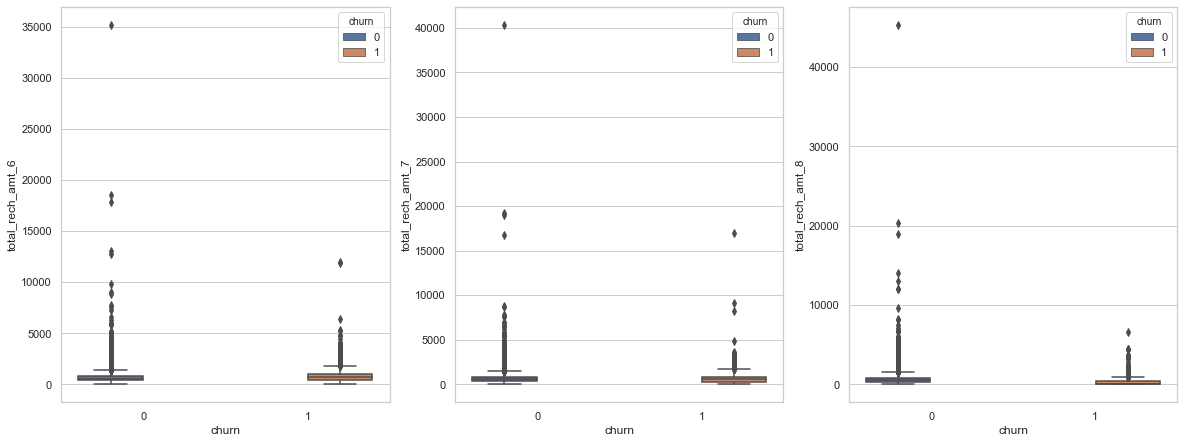

In [431]:
# Analyze how total_rech_amt is impacting churn
plot_box_chart('total_rech_amt', churn_updated)

### Observation : boxplots suggest that total recharge amount is dropping in 8th month.

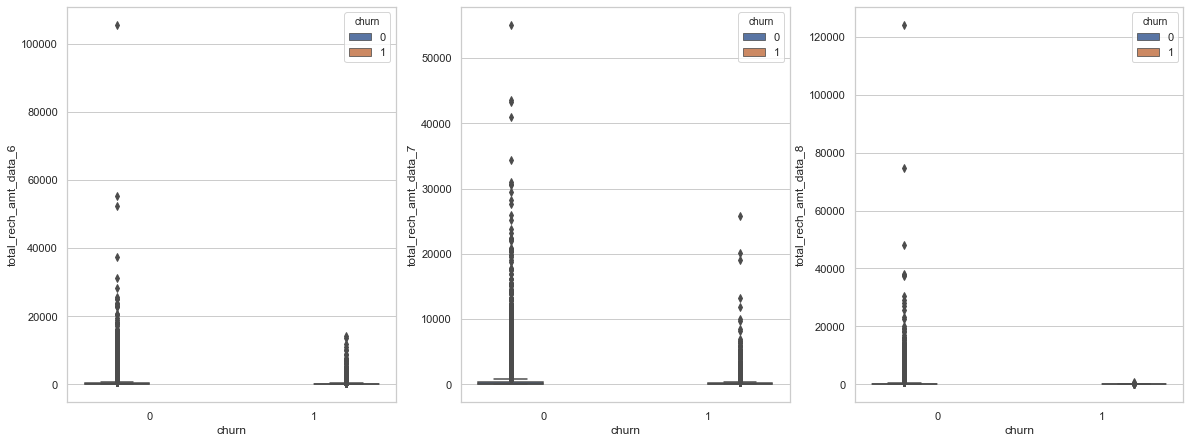

In [433]:
# Analyze how total_rech_amt_data is impacting churn
plot_box_chart('total_rech_amt_data', churn_updated)

### Observation : boxplots suggest that total recharge amount for data is dropping in 8th month

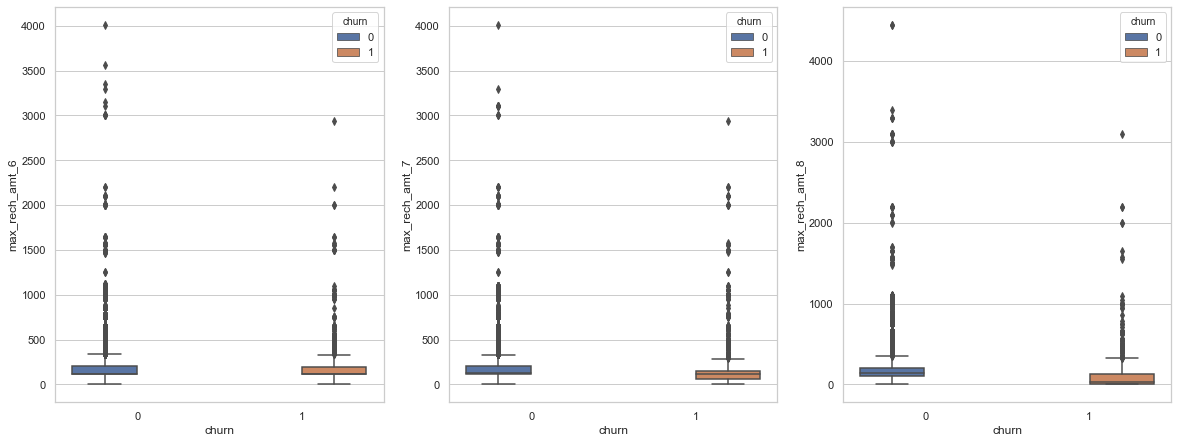

In [436]:
# Analyze how max_rech_amt is impacting churn
plot_box_chart('max_rech_amt', churn_updated)

### Observation : boxplots suggest that maximum recharge amount is dropping in 8th month

In [437]:
# Let us clean up nulls from recharge data
recharge_cols = churn_updated.columns[churn_updated.columns.str.contains('rech_num|max_rech_data',regex=True)]
100*churn_updated.loc[:,recharge_cols].isnull().sum()/len(churn_updated)

total_rech_num_6                   0.00
total_rech_num_7                   0.00
total_rech_num_8                   0.00
max_rech_data_6                   50.37
max_rech_data_7                   49.50
max_rech_data_8                   51.79
dtype: float64

In [438]:
churn_updated[recharge_cols].describe()

,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_data_6,max_rech_data_7,max_rech_data_8
count,"30,015.00","30,015.00","30,015.00","14,897.00","15,157.00","14,469.00"
mean,11.85,11.66,9.92,153.56,154.59,146.56
std,9.50,9.55,9.36,119.59,121.27,121.07
min,0.00,0.00,0.00,1.00,1.00,1.00
25%,6.00,6.00,4.00,49.00,46.00,25.00
50%,9.00,9.00,7.00,154.00,154.00,154.00
75%,15.00,15.00,13.00,198.00,198.00,198.00
max,307.00,138.00,196.00,"1,555.00","1,555.00","1,555.00"


In [439]:
## max_rech_data's minimum value is 1, the null values may mean no recharges happened for data, 
## so we can impute it with 0.
churn_updated.loc[:,['max_rech_data_6','max_rech_data_7','max_rech_data_8']] = churn_updated.loc[:,['max_rech_data_6','max_rech_data_7','max_rech_data_8']].replace(np.nan,0)

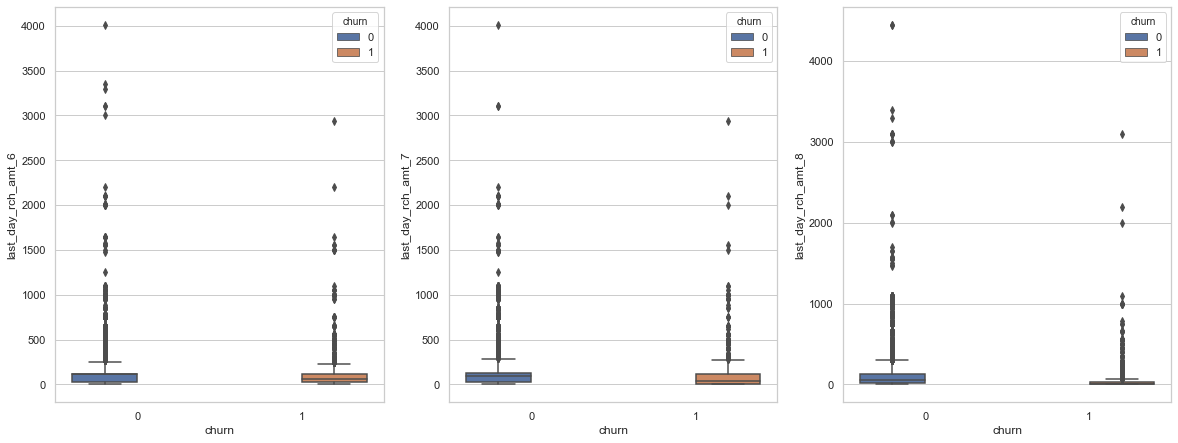

In [441]:
plot_box_chart('last_day_rch_amt',churn_updated)

## Modelling
### PCA

In [444]:
telecom_pca_df = churn_updated.copy()

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import IncrementalPCA

# creating functions for repeated tasks
def split_data(df):
    Y = df["churn"]
    X = df.drop(["churn","mobile_number"],axis=1)
    return X,Y
    
def scale_data(X):
    scaler = StandardScaler()
    X_col = X.columns
    X_scaled = scaler.fit_transform(X)
    X_scale_final = pd.DataFrame(X_scaled, columns=X_col)
    return X_scale_final

def get_scree_plot(X):
    pca = PCA(svd_solver='randomized', random_state=101)
    pca.fit(X)
    fig = plt.figure(figsize = (8,6))
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance')
    plt.show()
    return pca

def resampling_data(X,Y,feature_number,train_size=0.7,test_size=0.3) :    
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, train_size=train_size, random_state=1)
    # Applying PCA : 
    pca = IncrementalPCA(n_components=feature_number)    
    x_tr_pca = pca.fit_transform(x_tr)
    x_test_pca = pca.transform(x_test)

    return x_tr_pca,x_test_pca,y_tr,y_test
    

In [445]:
X,Y=split_data(telecom_pca_df)

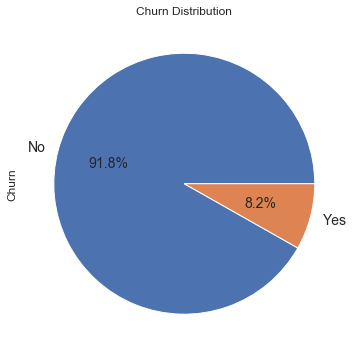

In [446]:
#Churn Distribution
pie_chart = telecom_pca_df['churn'].value_counts()*100.0 /len(telecom_pca_df)
ax = pie_chart.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(8,6), fontsize = 14 )                                                                           
ax.set_ylabel('Churn',fontsize = 12)
ax.set_title('Churn Distribution', fontsize = 12)
plt.show()

In [451]:

scale_data(X)
#X_scaled.head()

TypeError: invalid type promotion